# Understanding Why We Need Derivatives

## 🎯 The Big Question
**"Why do we need derivatives for activation functions?"**

This notebook will show you exactly why derivatives are the key to neural network learning!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Our activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

print("🧮 Functions ready! Let's explore why derivatives matter.")

🧮 Functions ready! Let's explore why derivatives matter.


## 🔗 The Chain Rule in Action

Let's trace through a simple example to see where derivatives come from:

In [ ]:
# Simple network: input → weight → activation → output
print("🔗 CHAIN RULE DEMONSTRATION")
print("=" * 40)

# Network setup
x = 2.0          # Input
w = 0.5          # Weight
target = 1.0     # What we want

print(f"Input: {x}")
print(f"Weight: {w}")
print(f"Target: {target}")

# Forward pass
z = w * x                    # Linear combination
a = sigmoid(z)               # Apply activation
error = (a - target) ** 2    # Calculate error

print(f"\nForward pass:")
print(f"z = w × x = {w} × {x} = {z}")
print(f"a = sigmoid({z}) = {a:.4f}")
print(f"error = (a - target)² = {error:.4f}")

# Backward pass - THIS IS WHERE DERIVATIVES COME IN!
d_error_d_a = 2 * (a - target)      # How error changes with activation

d_a_d_z = sigmoid_derivative(z)     # How activation changes with input (THE KEY!)
d_z_d_w = x                         # How input changes with weight

# Chain rule: multiply all the derivatives together
d_error_d_w = d_error_d_a * d_a_d_z * d_z_d_w

print(f"\nBackward pass (chain rule):")
print(f"∂error/∂a = {d_error_d_a:.4f}")
print(f"∂a/∂z = {d_a_d_z:.4f} ← THIS IS THE ACTIVATION DERIVATIVE!")
print(f"∂z/∂w = {d_z_d_w:.4f}")
print(f"∂error/∂w = {d_error_d_a:.4f} × {d_a_d_z:.4f} × {d_z_d_w:.4f} = {d_error_d_w:.4f}")

print(f"\n💡 The derivative {d_a_d_z:.4f} tells us how sensitive the activation is!")
print(f"   Without it, we couldn't calculate how to update the weight!")

🔗 CHAIN RULE DEMONSTRATION
Input: 2.0
Weight: 0.5
Target: 1.0

Forward pass:
z = w × x = 0.5 × 2.0 = 1.0
a = sigmoid(1.0) = 0.7311
error = (a - target)² = 0.0723

Backward pass (chain rule):
∂error/∂a = -0.5379
∂a/∂z = 0.1966 ← THIS IS THE ACTIVATION DERIVATIVE!
∂z/∂w = 2.0000
∂error/∂w = -0.5379 × 0.1966 × 2.0000 = -0.2115

💡 The derivative 0.1966 tells us how sensitive the activation is!
   Without it, we couldn't calculate how to update the weight!


## 🎨 Visualizing the Derivative

Let's see what the sigmoid derivative looks like and why it matters:

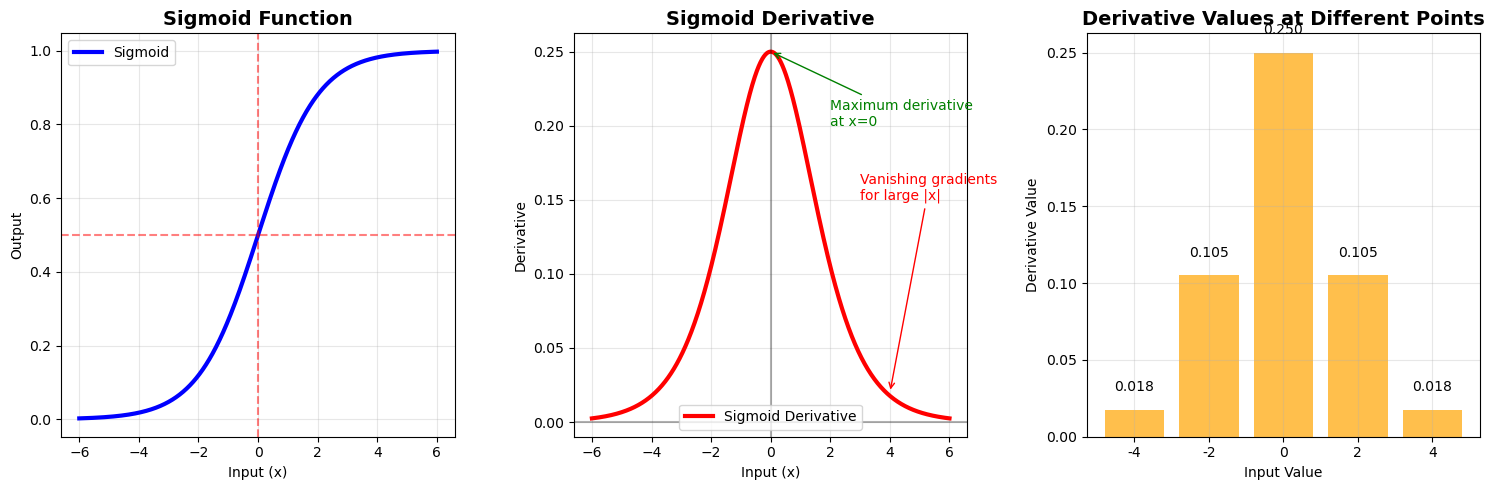

📊 Key Observations:
   • Maximum derivative at x=0: 0.250
   • Derivative at x=4: 0.017663 (tiny!)
   • Derivative at x=-4: 0.017663 (tiny!)

💡 When derivatives are tiny, learning becomes very slow!


In [3]:
# Plot sigmoid and its derivative
x = np.linspace(-6, 6, 1000)
y_sigmoid = sigmoid(x)
y_derivative = sigmoid_derivative(x)

plt.figure(figsize=(15, 5))

# Sigmoid function
plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, 'b-', linewidth=3, label='Sigmoid')
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

# Sigmoid derivative
plt.subplot(1, 3, 2)
plt.plot(x, y_derivative, 'r-', linewidth=3, label='Sigmoid Derivative')
plt.title('Sigmoid Derivative', fontsize=14, fontweight='bold')
plt.xlabel('Input (x)')
plt.ylabel('Derivative')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Highlight the problem areas
plt.annotate('Maximum derivative\nat x=0', xy=(0, 0.25), xytext=(2, 0.2),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=10, color='green')
plt.annotate('Vanishing gradients\nfor large |x|', xy=(4, 0.02), xytext=(3, 0.15),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

# Show specific values
plt.subplot(1, 3, 3)
test_points = [-4, -2, 0, 2, 4]
sig_values = [sigmoid(x) for x in test_points]
deriv_values = [sigmoid_derivative(x) for x in test_points]

plt.bar([str(x) for x in test_points], deriv_values, alpha=0.7, color='orange')
plt.title('Derivative Values at Different Points', fontsize=14, fontweight='bold')
plt.xlabel('Input Value')
plt.ylabel('Derivative Value')
plt.grid(True, alpha=0.3)

# Add value labels
for i, (x_val, deriv_val) in enumerate(zip(test_points, deriv_values)):
    plt.text(i, deriv_val + 0.01, f'{deriv_val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("📊 Key Observations:")
print(f"   • Maximum derivative at x=0: {sigmoid_derivative(0):.3f}")
print(f"   • Derivative at x=4: {sigmoid_derivative(4):.6f} (tiny!)")
print(f"   • Derivative at x=-4: {sigmoid_derivative(-4):.6f} (tiny!)")
print("\n💡 When derivatives are tiny, learning becomes very slow!")

## 🚨 The Vanishing Gradient Problem

Let's see what happens when we try to learn with tiny derivatives:

In [ ]:
# Compare learning with different input magnitudes
print("🚨 VANISHING GRADIENT DEMONSTRATION")
print("=" * 50)

def simulate_learning(input_val, initial_weight=0.1, target=1.0, learning_rate=0.5, steps=5):
    """Simulate learning for different input values"""
    w = initial_weight
    losses = []
    
    print(f"\nLearning with input = {input_val}:")
    print(f"{'Step':<6} {'Weight':<10} {'Output':<10} {'Loss':<10} {'Derivative':<12}")
    print("-" * 50)
    
    for step in range(steps):
        # Forward pass
        z = w * input_val
        output = sigmoid(z)
        loss = (output - target) ** 2
        
        # Backward pass
        derivative = sigmoid_derivative(z)
        gradient = 2 * (output - target) * derivative * input_val
        
        print(f"{step:<6} {w:<10.4f} {output:<10.4f} {loss:<10.6f} {derivative:<12.6f}")
        
        # Update weight
        w -= learning_rate * gradient
        losses.append(loss)
    
    return losses

# Test with small input (good derivatives)
small_losses = simulate_learning(input_val=1.0)

# Test with large input (tiny derivatives)
large_losses = simulate_learning(input_val=5.0)

print(f"\n📈 RESULTS:")
print(f"Small input (1.0) - Final loss: {small_losses[-1]:.6f}")
print(f"Large input (5.0) - Final loss: {large_losses[-1]:.6f}")
print(f"\n💡 Large inputs lead to tiny derivatives and slow learning!")

## 🔄 Why ReLU Solves This Problem

Let's compare sigmoid with ReLU derivatives:

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Compare derivatives for different inputs
print("🔄 SIGMOID vs ReLU DERIVATIVES")
print("=" * 40)

test_inputs = [-3, -1, 0, 1, 3, 5, 10]

print(f"{'Input':<8} {'Sigmoid Deriv':<15} {'ReLU Deriv':<12}")
print("-" * 35)

for x in test_inputs:
    sig_deriv = sigmoid_derivative(x)
    relu_deriv = relu_derivative(x)
    
    print(f"{x:<8} {sig_deriv:<15.6f} {relu_deriv:<12.0f}")

print(f"\n💡 Key Insights:")
print(f"   • Sigmoid derivatives get tiny for large |x|")
print(f"   • ReLU derivatives are always 1 for positive x")
print(f"   • This is why ReLU revolutionized deep learning!")

# Visualize the comparison
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_derivative(x), 'b-', linewidth=3, label='Sigmoid Derivative')
plt.plot(x, relu_derivative(x), 'r-', linewidth=3, label='ReLU Derivative')
plt.title('Derivative Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Input (x)')
plt.ylabel('Derivative')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.subplot(1, 2, 2)
# Show the impact on learning
large_inputs = [1, 2, 3, 4, 5]
sigmoid_derivs = [sigmoid_derivative(x) for x in large_inputs]
relu_derivs = [relu_derivative(x) for x in large_inputs]

x_pos = np.arange(len(large_inputs))
width = 0.35

plt.bar(x_pos - width/2, sigmoid_derivs, width, label='Sigmoid', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, relu_derivs, width, label='ReLU', alpha=0.7, color='red')

plt.title('Derivatives for Large Inputs', fontsize=14, fontweight='bold')
plt.xlabel('Input Value')
plt.ylabel('Derivative Value')
plt.xticks(x_pos, large_inputs)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎓 Summary: Why Derivatives Are Essential

Now you understand why derivatives are crucial for neural networks!

In [ ]:
print("🎓 WHY DERIVATIVES MATTER - SUMMARY")
print("=" * 50)
print("\n1. 🔗 CHAIN RULE REQUIREMENT:")
print("   • Backpropagation uses the chain rule from calculus")
print("   • Chain rule requires derivatives at each step")
print("   • ∂error/∂weight = ∂error/∂output × ∂output/∂activation × ∂activation/∂weight")
print("   • The middle term is the activation function derivative!")

print("\n2. 📏 LEARNING SPEED:")
print("   • Large derivatives → fast learning")
print("   • Small derivatives → slow learning")
print("   • Zero derivatives → no learning")

print("\n3. 🚨 VANISHING GRADIENTS:")
print("   • Sigmoid derivatives become tiny for large inputs")
print("   • This causes the vanishing gradient problem")
print("   • Deep networks can't learn effectively")

print("\n4. ✅ ReLU SOLUTION:")
print("   • ReLU derivative is 1 for positive inputs")
print("   • No vanishing gradient problem")
print("   • Enabled the deep learning revolution")

print("\n5. 🎯 THE BIG PICTURE:")
print("   • Derivatives tell us HOW MUCH to change each weight")
print("   • They're the mathematical bridge between error and weight updates")
print("   • Without them, neural networks couldn't learn efficiently")

print("\n💡 BOTTOM LINE:")
print("   Derivatives are not just mathematical details - they're the")
print("   fundamental mechanism that makes neural network learning possible!")

print("\n🚀 Now you understand why we implement both the activation")
print("   function AND its derivative in our neural networks!")